# Initialization for prediction

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# Autoreload allows the notebook to dynamically load code: if we update some helper functions outside of the notebook, we do not need to reload the notebook.
%load_ext autoreload
%autoreload 2

# All auxiliary code is in ../src
# code taken from: https://github.com/data-mining-UniPI/teaching24/tree/main/src
import sys
sys.path.append("./src/")

# Set style for seaborn
sns.set_theme(style="darkgrid")

# Other available themes:
# sns.set_theme(style="whitegrid")
# sns.set_theme(style="dark")
# sns.set_theme(style="white")
# sns.set_theme(style="ticks")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [370]:

# Load datasets
cyclists_df = pd.read_pickle('cyclists_transformed.pkl')
races_df = pd.read_pickle('races_transformed.pkl')

# Display info
print("Cyclists DataFrame:")
# print(cyclists_df.info())
cyclists_df.head()
print("\nRaces DataFrame:")
# print(races_df.info())
races_df.head()

Cyclists DataFrame:

Races DataFrame:


,_url,name,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,delta,day,year
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,0,sean-kelly,22,vini-ricordi-pinarello-sidermec-1986,0,1978-07-05,1978
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,0,1978-07-05,1978
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,0,1978-07-05,1978
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,0,1978-07-05,1978
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,0,1978-07-05,1978


In [371]:
races_merged_df = pd.merge(races_df, cyclists_df, left_on='cyclist', right_on='_url')
races_merged_df.head()

,_url_x,name_x,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,...,name_y,birth_year,weight,height,nationality,bmi,races_participated,average_delta,average_climb_total,average_length
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,...,gerrie knetemann,1951,80,185,netherlands,23.4,252,298,1736,160777
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,...,rené bittinger,1954,69,174,france,22.8,146,239,1571,171172
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,...,joseph bruyère,1948,75,182,belgium,22.6,33,78,1604,157898
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,...,sven-åke nilsson,1951,63,172,sweden,21.3,145,129,1814,168843
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,5,jacques-esclassan,30,kelme-costa-blanca-2000,...,jacques esclassan,1948,60,166,france,21.8,47,368,1793,157851


## Utilities

In [372]:
from sklearn.metrics import classification_report
def report_scores(labels, predictions):
    print(classification_report(labels, predictions, target_names=['Not Top-20', 'Top-20']))

## Computing the labels

In [373]:
races_merged_df['is_top_20'] = (races_merged_df['position'] <= 20).astype(int)
races_merged_df.head()

,_url_x,name_x,points,length,climb_total,startlist_quality,position,cyclist,cyclist_age,cyclist_team,...,birth_year,weight,height,nationality,bmi,races_participated,average_delta,average_climb_total,average_length,is_top_20
0,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,1,gerrie-knetemann,27,norway-1987,...,1951,80,185,netherlands,23.4,252,298,1736,160777,1
1,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,2,rene-bittinger,24,unknown,...,1954,69,174,france,22.8,146,239,1571,171172,1
2,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,3,joseph-bruyere,30,navigare-blue-storm-1993,...,1948,75,182,belgium,22.6,33,78,1604,157898,1
3,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,4,sven-ake-nilsson,27,spain-1991,...,1951,63,172,sweden,21.3,145,129,1814,168843,1
4,tour-de-france/1978/stage-6,tour de france,100,162000,1101,1241,5,jacques-esclassan,30,kelme-costa-blanca-2000,...,1948,60,166,france,21.8,47,368,1793,157851,1


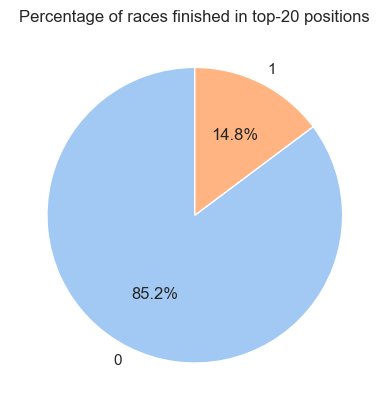

In [374]:
is_top_20_counts = races_merged_df['is_top_20'].value_counts()
is_top_20_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of races finished in top-20 positions')
plt.ylabel('')
plt.show()

## Sampling

In [375]:
from sklearn.model_selection import StratifiedShuffleSplit

SAMPLE_FRACTION = 0.10
expected_size = int(SAMPLE_FRACTION * len(races_merged_df))
split = StratifiedShuffleSplit(n_splits=1, test_size=SAMPLE_FRACTION, random_state=42)

for _, sample_index in split.split(races_merged_df, races_merged_df['is_top_20']):
    races_merged_df = races_merged_df.iloc[sample_index]

print(f"Sampling {SAMPLE_FRACTION*100:.1f}% of the dataset. That is {len(races_merged_df)} rows.")
assert abs(len(races_merged_df) - expected_size) <= 1, f"Sampled dataframe size does not match the expected sample fraction. Expected size: {expected_size}, but got: {len(races_merged_df)}"

Sampling 10.0% of the dataset. That is 33581 rows.


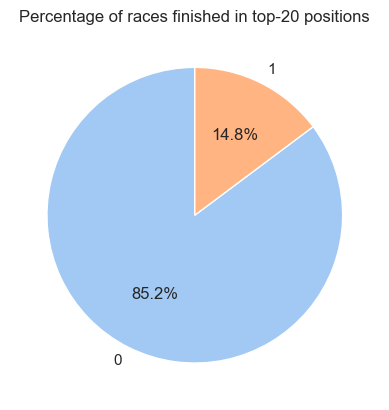

In [376]:
is_top_20_counts = races_merged_df['is_top_20'].value_counts()
is_top_20_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage of races finished in top-20 positions')
plt.ylabel('')
plt.show()

## Selecting the columns

Selecting only the columns relevant and useful for prediction and dropping the rest.
Since we want to predict the outcome of the race, we will also drop the columns that are not available before the match starts.

In [377]:
columns_to_drop = ['_url_x', 'name_x', '_url_y', 'name_y', 'cyclist', 'cyclist_team', 'day', 'birth_year', 'delta', 'average_delta', 'position']
races_merged_df.drop(columns=columns_to_drop, inplace=True)
races_merged_df.head()

,points,length,climb_total,startlist_quality,cyclist_age,year,weight,height,nationality,bmi,races_participated,average_climb_total,average_length,is_top_20
22335,80,235000,0,705,30,1983,70,178,spain,22.1,94,170,149793,0
141412,100,249100,3120,1646,25,2021,71,179,france,22.2,191,2577,170784,0
293273,80,146000,2215,621,37,2004,76,186,france,22.0,307,1542,171830,0
55066,80,209000,0,457,24,1981,81,190,spain,22.4,87,667,154016,0
68662,50,157600,2352,727,27,2012,63,177,belgium,20.1,224,2058,163555,1


## Discretizing the data

The categorical column "nationality" is discretized.

In [378]:
# function to discretize the variables
# input: the dataset and the list of variables' names to discretize
# credits: https://github.com/data-mining-UniPI/teaching24/blob/main/notebooks/machine_learning.ipynb
def discretize_data(dataset, variables):
    dataset_copy = dataset.copy()
    for variable in variables:
        # get the unique variable's values
        var = sorted(dataset_copy[variable].unique())
        
        # generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        # add a new column with the number representation of the variable
        dataset_copy[variable + '_num'] = dataset_copy[variable].map(mapping).astype(int)
    return dataset_copy

In [379]:
categorical_variables = ['nationality']

In [380]:
races_merged_discretized_df = discretize_data(races_merged_df, categorical_variables)
races_merged_discretized_df.drop(columns=categorical_variables, inplace=True)
races_merged_discretized_df.head()

,points,length,climb_total,startlist_quality,cyclist_age,year,weight,height,bmi,races_participated,average_climb_total,average_length,is_top_20,nationality_num
22335,80,235000,0,705,30,1983,70,178,22.1,94,170,149793,0,56
141412,100,249100,3120,1646,25,2021,71,179,22.2,191,2577,170784,0,23
293273,80,146000,2215,621,37,2004,76,186,22.0,307,1542,171830,0,23
55066,80,209000,0,457,24,1981,81,190,22.4,87,667,154016,0,56
68662,50,157600,2352,727,27,2012,63,177,20.1,224,2058,163555,1,7


Now we have:
- races_merged_discretized_df: the dataset, discretized

TODO: quando fai knn fai attenzione a non usare le colonne che hai dicretizzato credo

## Splitting for Training, Validation, and Test Sets

We will split our datasets into training, validation, and test sets.

The test set will consist of races from the year 2022 and onward, as requested in the project description. The remaining data will be split into training and validation sets. 

- The **training** set will be used to train the model
- The **validation** set will be used to tune and validate the model during the training process.
- The **test set** will be used at the end to evaluate the model's performance on unseen data.

In [381]:
from sklearn.model_selection import train_test_split

# Splits the data into training, validation, and test sets
def split_data(df, label_column):
    train_df = df[df['year'] < 2022]
    test_df = df[df['year'] >= 2022]

    # Further split the training set into training and validation sets
    train_set, validation_set = train_test_split(train_df, test_size=0.2, random_state=42)

    # Extract labels
    train_labels = train_set[label_column]
    validation_labels = validation_set[label_column]
    test_labels = test_df[label_column]

    # Drop labels from the datasets
    train_set = train_set.drop(columns=[label_column])
    validation_set = validation_set.drop(columns=[label_column])
    test_df = test_df.drop(columns=[label_column])

    return train_set, validation_set, test_df, train_labels, validation_labels, test_labels

In [382]:
train_set, validation_set, test_set, train_labels, validation_labels, test_labels = split_data(races_merged_discretized_df, 'is_top_20')

In [383]:
total_discretized = len(races_merged_discretized_df)
print(f"Discretized Data - Training set: {len(train_set)} ({len(train_set) / total_discretized:.2%}), Validation set: {len(validation_set)} ({len(validation_set) / total_discretized:.2%}), Test set: {len(test_set)} ({len(test_set) / total_discretized:.2%})")

Discretized Data - Training set: 24805 (73.87%), Validation set: 6202 (18.47%), Test set: 2574 (7.67%)


# Classification with KNN

In [384]:
knn_params_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    knn_params_grid,
    n_iter=50,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,  # Use all available cores
    random_state=42,
    verbose=3
)

knn_random_search.fit(train_set, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.852 total time=   0.2s
[CV 2/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.851 total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.852 total time=   0.2s
[CV 4/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.849 total time=   0.2s
[CV 1/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.768 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=16, weights=uniform;, score=0.851 total time=   0.2s
[CV 2/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.763 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.774 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.776 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.765 to

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan'],
                                        'n_neighbors': range(1, 21),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, verbose=3)

## Evaluation

Evaluating the performance of this classifier wrt the training and validation sets.

In [385]:
print(f"KNN EVALUATION")

print(f"Best parameters found by grid search: {knn_random_search.best_params_}")
print(f"Their accuracy on the train set is: {knn_random_search.best_score_:.2f}")

print(f"SAMPLE_FRACTION={SAMPLE_FRACTION}")
print ("\n")

best_knn = KNeighborsClassifier(**knn_random_search.best_params_)
best_knn.fit(train_set, train_labels)

print("Report of the performance on the TRAINING set:")
report_scores(train_labels, best_knn.predict(train_set))
print("\nReport of the performance on the VALIDATION set:")
report_scores(validation_labels, best_knn.predict(validation_set))

KNN EVALUATION
Best parameters found by grid search: {'weights': 'uniform', 'n_neighbors': 20, 'metric': 'euclidean'}
Their accuracy on the train set is: 0.85
SAMPLE_FRACTION=0.1


Report of the performance on the TRAINING set:
              precision    recall  f1-score   support

  Not Top-20       0.85      1.00      0.92     21137
      Top-20       0.73      0.01      0.01      3668

    accuracy                           0.85     24805
   macro avg       0.79      0.50      0.47     24805
weighted avg       0.83      0.85      0.79     24805


Report of the performance on the VALIDATION set:
              precision    recall  f1-score   support

  Not Top-20       0.86      1.00      0.92      5305
      Top-20       0.11      0.00      0.00       897

    accuracy                           0.85      6202
   macro avg       0.48      0.50      0.46      6202
weighted avg       0.75      0.85      0.79      6202

